<a href="https://colab.research.google.com/github/galadriel2486/fraud_detection_online_transactions/blob/main/DataGirlsOnboardingProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

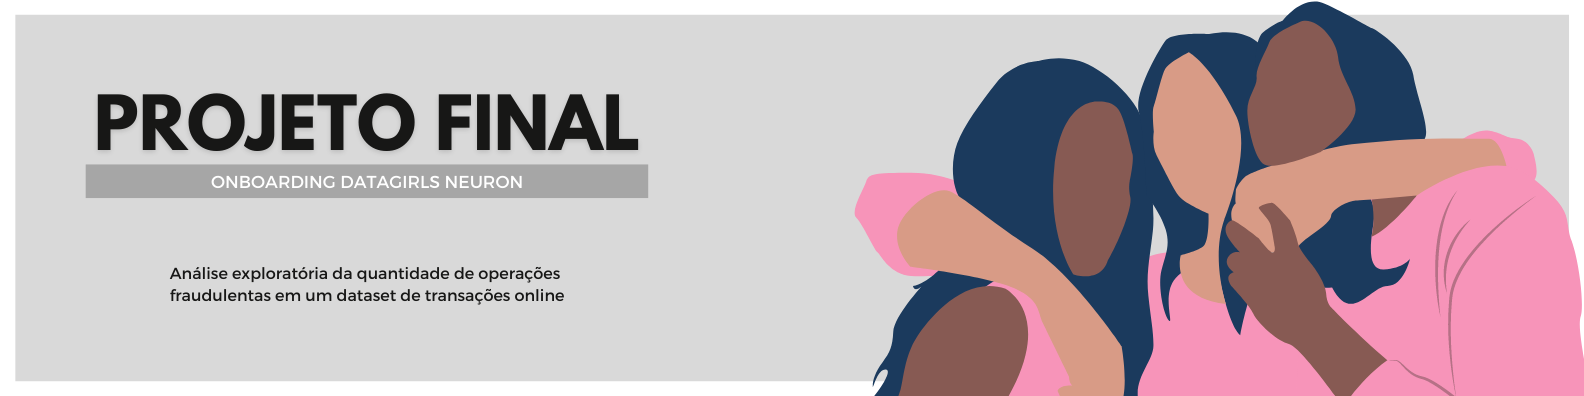

# Introdução

**Dataset**

[Online Payments Fraud Detection Dataset](https:///www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset?resource=download)

<br />

**Problema** 

Em qual forma de pagamento ocorre fraude com maior frequência?

<br />

**Sobre o dataset**

O dataset deste projeto foi baixado do Kaggle, e se trata de um conjunto de dados para testes. Ele apresenta as seguintes colunas:
- **step:** expressa 1 hora de tempo
- **type:** forma de pagamento
- **amount:** valor pago na transação (U$S)
- **nameOrig:** cliente que realizou a transação
- **oldbalanceOrg:** balanço financeiro antes da transação
- **newbalanceOrig:** balanço financeiro depois da transação
- **nameDest:** destinatário da transação
- **oldbalanceDest:** balanço inicial do beneficiário
- **newbalanceDest:** balanço final do beneficiário
- **isFraud:** transação fraudulenta
- **isFlaggedFraud:** a transação foi sinalizada como fraudulenta

Devido ao problema que pretendemos analisar, apenas algumas colunas nos interessam: type, amount, isFraud, isFlaggedFraud. As demais serão desconsideradas. 

Não há nenhuma informação acerca do dataframe que indique as unidades monetárias dos valores presentes na coluna "amount". Por isso, para fins de análise, utilizaremos a referência do dólar.



# 1. Importação das bibliotecas e leitura do dataset

Primeiro, faremos a importação das bibliotecas que utilizaremos para a leitura e limpeza do dataset e a plotagem dos gráficos. 

O Pandas é uma biblioteca Python muito rica que costuma ser bastante utilizada para a manipulação inicial dos dados. Ela também possui uma série de funções para a elaboração dos visuais. Também utilizaremos o Matplotlib (outra biblioteca Python) para complementar esse recurso tendo em vista que esta última foi criada para a visualização de dados.

In [2]:
import pandas as pd # Para análise exploratória e limpeza dos dados
import matplotlib.pyplot as plt # Para plotagem dos gráficos
from matplotlib.pyplot import figure # Para configuração do tamanho dos gráficos plotados com matplotlib

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/OnlinePaymentFraudDataset.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


# 2. Limpeza dos dados

#### Passo 1. Verificação e remoção dos valores nulos (NaN)

In [4]:
# Verificação se existem valores nulos no dataset
df.isnull().values.any()

False

In [5]:
# Verificação se existem valores nulos na coluna "isFraud"
df['isFraud'].isnull().values.any()

False

In [6]:
# Contagem de quantos valores nulos existem na coluna "isFraud"
df['isFraud'].isnull().sum()

0

In [7]:
# Cópia do dataset sem os valores nulos em uma nova variável
df_notnull = df[df['isFraud'].notna()]
df_notnull.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Passo 2. Verificação e remoção de linhas duplicadas

In [8]:
# Verificação se existem linhas duplicadas no dataset
df_notnull[df_notnull.duplicated(keep="first")]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


#### Passo 3. Conversão das colunas "isFraud" e "isFlaggedFraud" em números inteiros

In [9]:
df_notnull = df_notnull.astype({'isFraud': int, 'isFlaggedFraud': int})
df_notnull.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Passo 4. Mudança do nome de algumas colunas

In [10]:
df_notnull = df_notnull.rename(columns={'step': 'unitOfTimeHour','oldbalanceOrg': 'oldBalanceOrig', 'newbalanceOrig': 'newBalanceOrig', 'oldbalanceDest': 'oldBalanceDest', 'newbalanceDest': 'newBalanceDest'})
df_notnull.head()

,unitOfTimeHour,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


#### Passo 5. Sumarização do dataset para as colunas de interesse

In [11]:
df_final = df_notnull.drop(columns= ['unitOfTimeHour','oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest', 'newBalanceDest', 'nameOrig', 'nameDest'])
df_final.head()

,type,amount,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,0,0
1,PAYMENT,1864.28,0,0
2,TRANSFER,181.00,1,0
3,CASH_OUT,181.00,1,0
4,PAYMENT,11668.14,0,0


# 3. Análise dos dados

#### Problema 1. Análise Descritiva

Primeiramente, realizaremos uma análise descritiva geral dos valores contidos na coluna "amount". O motivo é que as demais colunas são do tipo categóricas, portanto, as operações da função describe() do Pandas retornarão resultados incorretos caso forem aplicadas a elas.

Para que a função describe() apresente os valores sem a notação científica que aparece por default, utilizamos a função lambda da programação funcional do Python. Em linhas gerais, a ideia é converter cada valor em float (decimal) e, em seguida, formatar para conter duas casas decimais.

In [12]:
df_final["amount"].describe().apply(lambda x: format(x, '.2f'))

count     6362620.00
mean       179861.90
std        603858.23
min             0.00
25%         13389.57
50%         74871.94
75%        208721.48
max      92445516.64
Name: amount, dtype: object

O que é interessante de observar do resultado acima é que temos um desvio padrão bem grande. Isso significa que há um intervalo bem espaçado entre os valores, como podemos confirmar pelo gráfico boxplot abaixo, repleto de outliers.

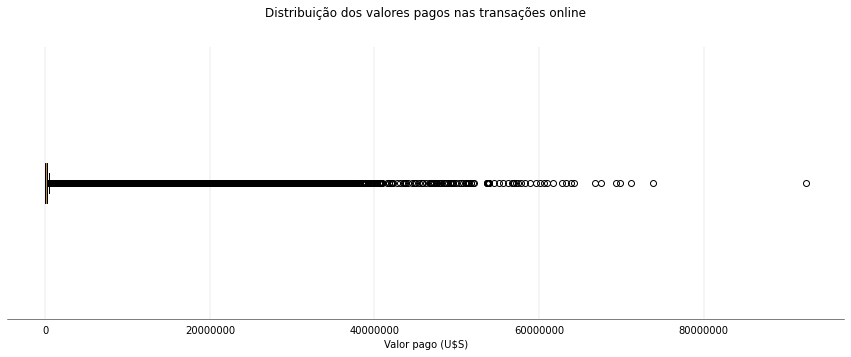

In [13]:
# Define o objeto gráfico
fig1, ax1 = plt.subplots(figsize=(15,5))

# Remove as bordas da caixa em que o gráfico se insere
for axis in ['top','left','right']:
  ax1.spines[axis].set_visible(False)

# Formata a espessura da linha do eixo x
ax1.spines['bottom'].set_linewidth(0.5)

# Remove os traços indicadores do eixo x
ax1.tick_params(bottom=False)

# Insere o grid vertical
ax1.grid(axis='x', ls='-', lw=0.25)

# Remove a notação científica dos eixos
ax1.ticklabel_format(useOffset=False, style='plain')

# Oculta o eixo y
ax1.get_yaxis().set_visible(False)

# Define o título do gráfico
ax1.set_title("Distribuição dos valores pagos nas transações online", pad=30)

# Plotagem do gráfico
ax1.boxplot(df_final["amount"], medianprops=dict(color="#B68F40"), vert=False, showfliers=True)
plt.xlabel("Valor pago (U$S)")
plt.show()

Se removermos os outliers da plotagem do gráfico teremos uma noção um pouco mais clara da distribuição da maior parte dos valores pagos nas transações online.

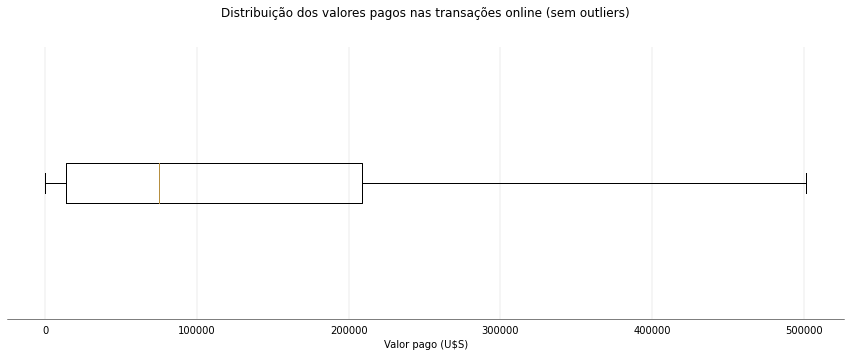

In [14]:
fig2, ax2 = plt.subplots(figsize=(15,5))
for axis in ['top','left','right']:
  ax2.spines[axis].set_visible(False)
ax2.spines['bottom'].set_linewidth(0.5)
ax2.tick_params(bottom=False)
ax2.grid(axis='x', ls='-', lw=0.25)
ax2.ticklabel_format(useOffset=False, style='plain')
ax2.get_yaxis().set_visible(False)
ax2.set_title("Distribuição dos valores pagos nas transações online (sem outliers)", pad=30)
ax2.boxplot(df_final["amount"], medianprops=dict(color="#B68F40"), vert=False, showfliers=False)
plt.xlabel("Valor pago (U$S)")
plt.show()

Abaixo, criamos um dataframe sem outliers copiando os dados do dataframe original para uma nova variável porém, removendo os valores que se encontram de fora do intervalo interquartil. Estes valores estão para baixo e para cima do intervalo. A partir deste objeto, será possível analisar um cenário estatístico mais próximo da realidade.

In [15]:
# Define os pontos mínimo e máximo do intervalo que exclua os outliers (abaixo de 25% e acima de 75% da área sob a curva)
q1 = df_final['amount'].quantile(0.25)
q3 = df_final['amount'].quantile(0.75)

# Fórmula que calcula o intervalo interquartil (entre Q1 e Q3)
iqr = q3-q1

# Estabelece os cálculos que resultam no valor de Q1 (mínimo interquartil) e Q3 (máximo interquartil) 
iqr_min  = q1-1.5*iqr
iqr_max = q3+1.5*iqr

# Desenvolve o intervalo a partir de um operador booleano e o armazena em uma variável
df_semoutliers = df_final.loc[(df_final['amount'] > iqr_min) & (df_final['amount'] < iqr_max)]

In [16]:
df_semoutliers["amount"].describe().apply(lambda x: format(x, '.2f'))

count    6024542.00
mean      111534.18
std       120398.31
min            0.00
25%        12368.54
50%        63175.82
75%       182933.78
max       501718.41
Name: amount, dtype: object

Como podemos perceber, o desvio padrão diminuiu 6 vezes em relação a sua dimensão original. Isto significa que o intervalo reduziu e não temos um espaçamento numérico tão amplo. O menor valor pago nas transações online continua sendo zero, porém, o maior valor é U$S 501.718,41.

In [17]:
df_semoutliers["amount"].median()

63175.815

Observamos que há uma discrepância considerável entre a mediana e a média do intervalo. Considerando a média como a soma de todos os valores dividido pelo total de unidades somadas, e a mediana, o valor central de um intervalo, quanto mais próximas estiverem uma da outra, mais próximo o intervalo estará de uma distribuição normal. A mediana auxilia na identificação de distribuições numéricas distorcidas, que é o nosso caso mesmo removendo os outliers.

<function matplotlib.pyplot.show>

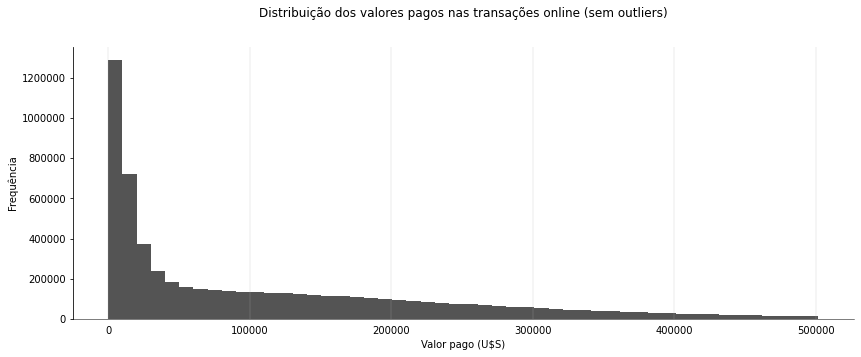

In [18]:
fig3, ax3 = plt.subplots(figsize=(14,5))
for axis in ['top','right']:
  ax3.spines[axis].set_visible(False)
ax3.spines['bottom'].set_linewidth(0.5)
ax3.tick_params(bottom=False)
ax3.grid(axis='x', ls='-', lw=0.25)
ax3.ticklabel_format(useOffset=False, style='plain')
ax3.set_title("Distribuição dos valores pagos nas transações online (sem outliers)", pad=30)
ax3.hist(df_semoutliers["amount"], bins=50, lw=0.5, facecolor="#545454")
plt.xlabel("Valor pago (U$S)")
plt.ylabel("Frequência")
plt.show

#### Problema 2. Do total de transações, quantas são fraudulentas?

Agora vamos identificar a porcentagem de operações fraudulentas em relação às não-fradulentas. Também será interessante observar se essa taxa se mantém similar ao realizarmos a mesma análise das transações que foram sinalizadas como fraudulentas. A ideia seria avaliar o grau de detecção de fraude da inteligência artificial aplicada.

In [19]:
# A quantidade total de transações é definida pelo total de linhas do dataframe.
len(df_semoutliers["isFraud"])

6024542

In [20]:
df_semoutliers["isFraud"].value_counts()

0    6020183
1       4359
Name: isFraud, dtype: int64

Do total de 6.024.542 transações, 4.359 são consideradas fraudulentas, ou seja, menos de 1% das operações (apx. 0.07%).

In [21]:
df_semoutliers["isFlaggedFraud"].value_counts()

0    6024540
1          2
Name: isFlaggedFraud, dtype: int64

Mais de 99,95% das operações consideradas fraudulentas não foram detectadas e sinalizadas como tal pela inteligência artificial. Das 4.359 fraudes em transações online, apenas 2 foram sinalizadas. Isso pode estar ocorrendo por diversas razões:
- A inteligência artificial não foi devidamente treinada em uma quantidade de testes suficientes até o aprimoramento máximo de sua eficácia de detecção;
- Pode ser que o treino não tenha sido atualizado, o que implica que novos dados foram inseridos mas não foram avaliados com o sistema de IA vigente;
- Foi utilizado um método inadequado para treiná-la, dentre outros problemas...

OBS.: em média, um padrão considerado ótimo para a caracterização de uma bom sistema de IA é 80%. No nosso contexto, isto significa que ela deveria ter detectado, pelo menos, 80% das operações fraudulentas ocorridas.

#### Problema 3. Qual a proporção dos valores gastos em operações fraudulentas em relação às não-fraudulentas?

Antes de nos dirigirmos ao cerne do problema que nos dispomos a analisar, seria interessante entendermos antes qual a proporção de movimentação financeira entre os valores pagos em operações fradulentas e não-fraudulentas. Embora saibamos que as operações fraudulentas compõem 1% do total de transações, é possível que esse conjunto envolva transações de grandes valores. É neste momento que poderemos o grau de significância deste 1%.

In [22]:
df_fraude = df_semoutliers.query("isFraud == 1")
df_fraude.head()

,type,amount,isFraud,isFlaggedFraud
2,TRANSFER,181.0,1,0
3,CASH_OUT,181.0,1,0
251,TRANSFER,2806.0,1,0
252,CASH_OUT,2806.0,1,0
680,TRANSFER,20128.0,1,0


In [23]:
# Soma do total pago nas transações fraudulentas
df_fraude["amount"].sum()

759399805.2

In [26]:
df_semfraude = df_semoutliers.query("isFraud == 0")
df_semfraude.head()

,type,amount,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,0,0
1,PAYMENT,1864.28,0,0
4,PAYMENT,11668.14,0,0
5,PAYMENT,7817.71,0,0
6,PAYMENT,7107.77,0,0


In [27]:
# Soma do total pago nas transações não-fraudulentas
df_semfraude["amount"].sum()

671182953863.5302

In [28]:
# Soma do total pago em todas as transações (fraudulentas ou não)
df_semoutliers["amount"].sum()

671942353668.7296

As transações não-fraudulentas movimentou, aproximadamente, 671 bilhões de dólares, enquanto as fraudes totalizaram uma movimentação de 759 milhões de dólares. Em relação ao valor pago nas transações, as operações fraudulentas correspondem a pouco mais de 1% do total pago em todas as movimentações.

Ainda que as transações fraudulentas correspondam a uma proporção baixa em comparação com as não-fraudulentas em relação ao valor das transações, elas movimentaram um volume financeiro na casa das centenas de milhões de dólares, o que certamente as torna um problema de relevância maior.

#### Problema 4. Quais as formas de pagamento mais utilizadas e, delas, quais apresentam maior volume de fraudes?

In [29]:
df_semoutliers["type"].value_counts()

CASH_OUT    2185249
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     272542
DEBIT         41430
Name: type, dtype: int64

De antemão já podemos avaliar que os meios de pagamento saque e pagamento (provavelmente no crédito) foram os mais utilizados. Mas vamos ter uma visão melhor dessa distribuição no gráfico logo abaixo.

In [37]:
# Antes de plotar o gráfico, decidimos criar um dataframe apenas com a contagem dos meios de pagamento
df_paymentcount = df_semoutliers["type"].value_counts().rename_axis('FormasDePagamento').reset_index(name='Contagem')
df_paymentcount

,FormasDePagamento,Contagem
0,CASH_OUT,2185249
1,PAYMENT,2151495
2,CASH_IN,1373826
3,TRANSFER,272542
4,DEBIT,41430


<function matplotlib.pyplot.show>

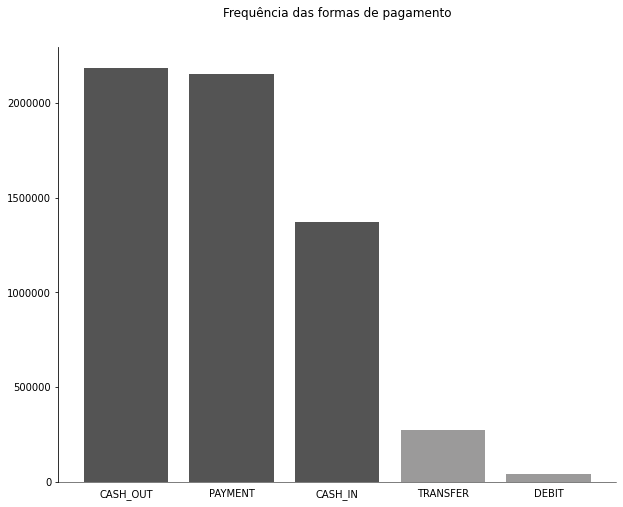

In [58]:
pagamento = df_paymentcount["FormasDePagamento"]
contagem = df_paymentcount["Contagem"]

fig4, ax4 = plt.subplots(figsize=(10,8))
for axis in ['top','right']:
  ax4.spines[axis].set_visible(False)
ax4.spines['bottom'].set_linewidth(0.5)
ax4.tick_params(bottom=False)
ax4.ticklabel_format(useOffset=False, style='plain') 
plt.bar(pagamento, contagem, color=["#545454", "#545454", "#545454", "#9B9A9A", "#9B9A9A"])
ax4.set_title("Frequência das formas de pagamento", pad=30)
plt.show

No gráfico, as três formas de pagamento mais utilizadas foram marcadas na cor cinza escuro, enquanto o restante ficou com a cor cinza claro. Conseguimos perceber uma diferença relevante entre a terceira forma de pagamento mais utilizada (Cash in = Depósito) e a quarta (Transfer = Transferência), o que indica que, de fato, as três formas que estão no topo são majoritárias.


In [59]:
df_paymentcount["Contagem"].sum()

6024542

As três formas de pagamento mais utilizadas correspondem a quase 95% do total de transações realizadas. Agora vamos avaliar em qual forma de pagamento ocorrem mais fraudes. Para isso, utilizaremos os dois dataframes criados anteriomente: o df_semfraude (contém apenas todos os valores das operações não-fraudulentas) e o df_fraude (contém apenas todos os valores das operações fraudulentas).

In [61]:
df_semfraude["type"].value_counts()

CASH_OUT    2183052
PAYMENT     2151495
CASH_IN     1373826
TRANSFER     270380
DEBIT         41430
Name: type, dtype: int64

In [64]:
df_paymentcount_semfraude = df_semfraude["type"].value_counts().rename_axis('FormasDePagamento').reset_index(name='Contagem')
df_paymentcount_semfraude

,FormasDePagamento,Contagem
0,CASH_OUT,2183052
1,PAYMENT,2151495
2,CASH_IN,1373826
3,TRANSFER,270380
4,DEBIT,41430


<function matplotlib.pyplot.show>

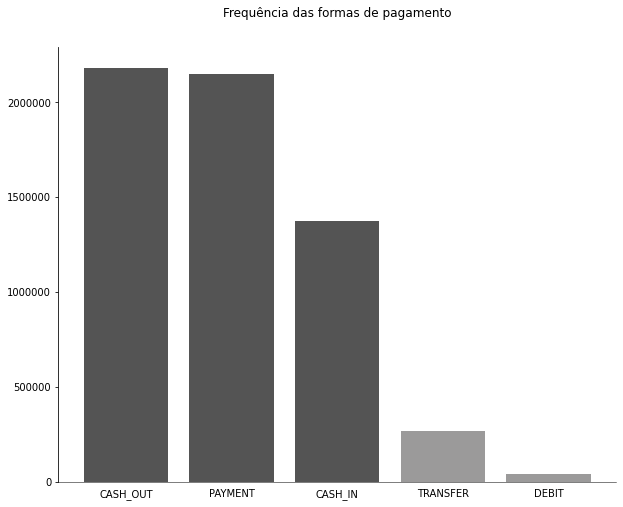

In [65]:
pagamento = df_paymentcount_semfraude["FormasDePagamento"]
contagem = df_paymentcount_semfraude["Contagem"]

fig4, ax4 = plt.subplots(figsize=(10,8))
for axis in ['top','right']:
  ax4.spines[axis].set_visible(False)
ax4.spines['bottom'].set_linewidth(0.5)
ax4.tick_params(bottom=False)
ax4.ticklabel_format(useOffset=False, style='plain') 
plt.bar(pagamento, contagem, color=["#545454", "#545454", "#545454", "#9B9A9A", "#9B9A9A"])
ax4.set_title("Frequência das formas de pagamento", pad=30)
plt.show

Nas operações não-fraudulentas, as três formas de pagamento mais utilizadas permanecem as mesmas.

In [66]:
df_fraude["type"].value_counts()

CASH_OUT    2197
TRANSFER    2162
Name: type, dtype: int64

In [67]:
df_paymentcount_fraude = df_fraude["type"].value_counts().rename_axis('FormasDePagamento').reset_index(name='Contagem')
df_paymentcount_fraude

,FormasDePagamento,Contagem
0,CASH_OUT,2197
1,TRANSFER,2162


<function matplotlib.pyplot.show>

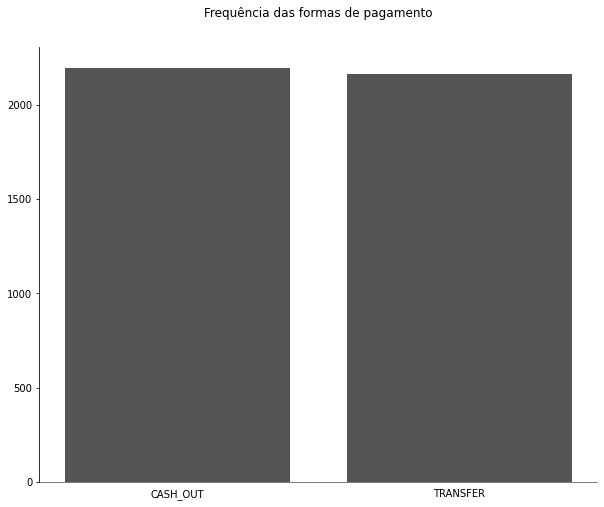

In [69]:
pagamento = df_paymentcount_fraude["FormasDePagamento"]
contagem = df_paymentcount_fraude["Contagem"]

fig4, ax4 = plt.subplots(figsize=(10,8))
for axis in ['top','right']:
  ax4.spines[axis].set_visible(False)
ax4.spines['bottom'].set_linewidth(0.5)
ax4.tick_params(bottom=False)
ax4.ticklabel_format(useOffset=False, style='plain') 
plt.bar(pagamento, contagem, color="#545454")
ax4.set_title("Frequência das formas de pagamento", pad=30)
plt.show

Já nas transações fraudulentas, as formas de pagamento mais utilizadas são saque e transferência. Uma consideração interessante é que, no total das formas de pagamento apresentado no dataset, a transferência é uma dos tipos menos utilizados, embora seja um dos preferidos nas fraudes.

# Conclusão

O problema da fraude nas transações online não se restringe somente à relação entre empresas e clientes, mas aos bancos também, que intermediam essas operações e acabam sendo prejudicados. O dataset também inclui operações financeiras bancárias, o que indica que ele não se limitou apenas movimentações de compra somente.

O que exploramos em nossa análise foram alguns parâmetros iniciais que avaliam algumas tendências para a identificação das transações fraudulentas. Percebemos que, embora o volume seja pequeno em comparação ao total movimentado, ainda é significativo em termos de valores que, como vimos, chega na casa das centenas de milhões em fraudes.

Outro ponto que se destacou foi que quase 50% das operações consideradas "fraude" foram realizadas na forma de transferência, o que, em um segundo momento, podemos nos questionar se elas poderiam se referir aos golpes digitais que operam, majoritariamente, sobre este modo de pagamento.

Também identificamos que a inteligência artificial de detecção de fraude não foi capaz de sinalizar, com eficiência, quais das operações eram fraudulentas, e apontamos os motivos para isso ter ocorrido.

A partir dos valores analisados e dos datasets criados, um próximo passo seria criar um indicador que apontasse, a partir das características observadas, se determinada operação financeira seria ou não fraudulenta. Se trata de uma primeira etapa para desenvolver um sistema de aprendizado de máquina mais robusto, que levasse em consideração todos os critérios apresentados na tabela original.